# Controllability and Network Size

In [131]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import importlib
import seaborn as sns

import data_io as myIO
importlib.reload(myIO)
import brainnet_viewer as bnv
importlib.reload(bnv)

NETWORK_SIZES = [83, 234, 463, 1015]
MY_DOT_COLORS = {83: "lightsteelblue", 234: "aquamarine", 463: "lavender", 1015: "thistle"}
MY_LINE_COLORS = {83: "royalblue", 234: "lightseagreen", 463: "slateblue", 1015: "purple"}

# First get the node information for plotting in BNV

In [203]:
n = 1015
raw_data = myIO.open_data(f"./repeated_10_scale_{n}/", 1)
connectome_data = {'dn_name': [], 'dn_id': [], 'X': [],
                   'Y': [], 'Z': []}
for fn, G in raw_data.items():
    print(len(G.nodes()))
    for ni, x in G.nodes(data=True):
        connectome_data['dn_name'].append(x['dn_name'])
        connectome_data['dn_id'].append(ni)
        connectome_data['X'].append(x['dn_position_x'])
        connectome_data['Y'].append(x['dn_position_y'])
        connectome_data['Z'].append(x['dn_position_z'])

connectome_df = pd.DataFrame(connectome_data)
# connectome_df.to_csv(f'./node_data_{n}.csv')

  0%|          | 1/1064 [00:00<05:35,  3.17it/s]

1015


Compute controllability information and store in networkX graph object G

In [139]:
# importlib.reload(myIO)
n = 83
raw_data = myIO.open_data2(f"./repeated_10_scale_86/", 1064)
# myIO.save_to_pickle(raw_data, "./pickles/", f"connectomes_{n}.pkl")

100%|██████████| 1064/1064 [01:48<00:00,  9.78it/s]

Group connectome edge weight info: 
	min mean W: 476.78068693693695
	max mean W: 952.8660714285714
	Group mean W: 643.9761655221332


In [140]:
for k, G in raw_data.items():
    print(len(G.nodes()))
    break

83


Look at the ctrb vs node degree

In [141]:
data = {'n': [], 'degree': [], 'avgCtrb': [], 'modCtrb': []}
nodal_avg = {'degree': np.zeros(n), 'avgCtrb': np.zeros(n), 'modCtrb': np.zeros(n)}
for k, G in raw_data.items():
    ac = [x[1] for x in G.nodes(data='avgCtrb')]
    mc = [x[1] for x in G.nodes(data='modCtrb')]
    d = list(np.array([x[1] for x in G.degree(weight='number_of_fibers')])/np.array([x[1] if x[1] != 0 else 1 for x in G.degree()]))
    nodal_avg['degree'] += np.array(d)
    nodal_avg['avgCtrb'] += np.array(ac)
    nodal_avg['modCtrb'] += np.array(mc)
    data['degree'] += d
    data['avgCtrb'] += ac
    data['modCtrb'] += mc

data['n'] = np.ones(len(data['degree']))*n
nodal_avg['degree'] = nodal_avg['degree']/len(raw_data)
nodal_avg['avgCtrb'] = nodal_avg['avgCtrb']/len(raw_data)
nodal_avg['modCtrb'] = nodal_avg['modCtrb']/len(raw_data)
with open(f'./pickles/connectome_{n}_ctrb_data.pkl', 'wb') as f:
    pkl.dump(data, f)
    pkl.dump(nodal_avg, f)

Text(0, 0.5, 'Average Controllability')

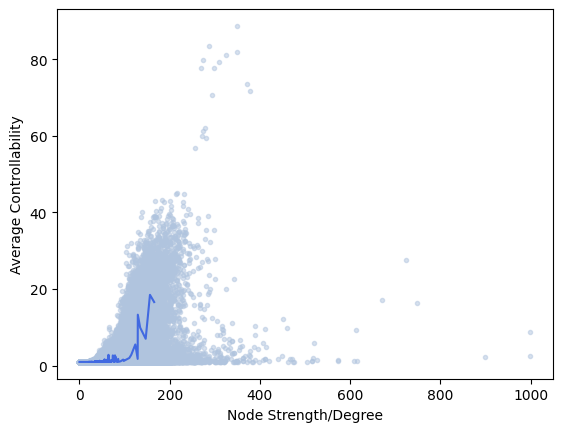

In [130]:
plot_data = pd.DataFrame(data)
plt.scatter(plot_data['degree'], plot_data['avgCtrb'], marker=".", color="lightsteelblue", alpha=0.5)
x, y = zip(*sorted(zip(nodal_avg['degree'], nodal_avg['avgCtrb'])))
plt.plot(list(x), list(y), color="royalblue")
plt.xlabel("Node Strength/Degree")
plt.ylabel("Average Controllability")


Load in all 4 connectome type's controllability values.
- [X] Average Controllability
- [X] Modal Controllability

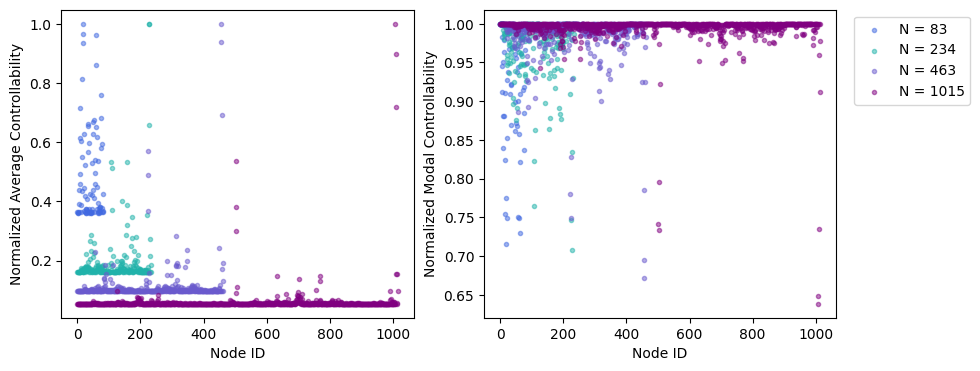

In [177]:
# all_data = {'n': [], 'degree': [], 'avgCtrb': [], 'modCtrb': []}
threshold = 0.60
special_nodes = {83: [], 234: [], 463: [], 1015: []}
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
for n in [83, 234, 463, 1015]:
    plot_data = None
    with open(f'./pickles/connectome_{n}_ctrb_data.pkl', 'rb') as f:
        _ = pkl.load(f)
        data = pkl.load(f)

    avgCtrb = np.array(data['avgCtrb'])/max(data['avgCtrb'])
    modCtrb = np.array(data['modCtrb'])/max(data['modCtrb'])

    special_nodes[n] = [i for i, x in enumerate(avgCtrb > threshold) if x]
    plot_data = pd.DataFrame(data)
    axs[0].scatter([i for i in range(n)], avgCtrb, marker=".", color=MY_LINE_COLORS[n], alpha=0.5)
    axs[1].scatter([i for i in range(n)], modCtrb, marker=".", color=MY_LINE_COLORS[n], alpha=0.5, label=f'N = {n}')
    # plt.plot(list(x), list(y), color="royalblue")
# plt.xlabel("Node Id")
axs[0].set_ylabel("Normalized Average Controllability")
axs[1].set_ylabel("Normalized Modal Controllability")
axs[0].set_xlabel("Node ID")
axs[1].set_xlabel("Node ID")
axs[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))
fig.savefig("./Nodal Controllability.png", dpi=300, bbox_inches='tight')

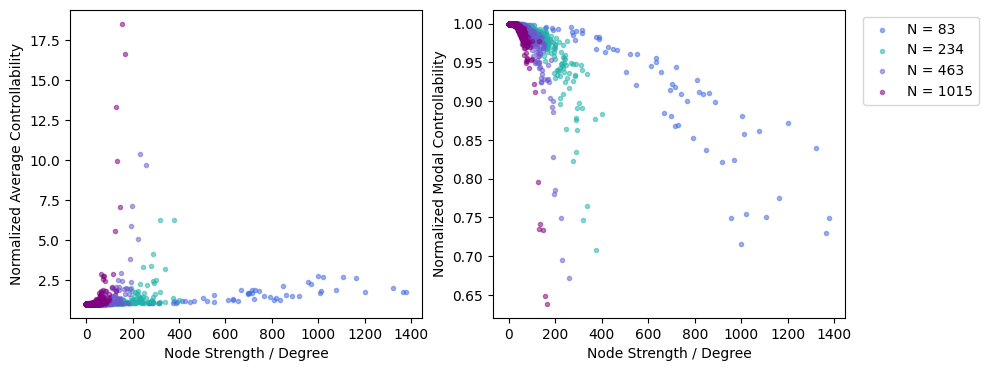

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
for n in [83, 234, 463, 1015]:
    plot_data = None
    with open(f'./pickles/connectome_{n}_ctrb_data.pkl', 'rb') as f:
        _ = pkl.load(f)
        data = pkl.load(f)
    x, y = zip(*sorted(zip(data['degree'], data['avgCtrb'])))
    axs[0].scatter(x, y, marker=".", color=MY_LINE_COLORS[n], alpha=0.5)
    x, y = zip(*sorted(zip(data['degree'], data['modCtrb'])))
    axs[1].scatter(x, y, marker=".", color=MY_LINE_COLORS[n], alpha=0.5, label=f'N = {n}')

axs[0].set_ylabel("Normalized Average Controllability")
axs[1].set_ylabel("Normalized Modal Controllability")
axs[1].legend(loc='upper right', bbox_to_anchor=(1.4, 1))

axs[0].set_xlabel("Node Strength / Degree")
axs[1].set_xlabel("Node Strength / Degree")
fig.savefig("./Strength v Controllability.png", dpi=300, bbox_inches='tight')

Create some .node files to draw into BrainNet Viewer

In [205]:
print(connectome_df.head(5))
new_names = [nn.replace(".", "-") for nn in connectome_df['dn_name']]
connectome_df['dn_name'] = new_names
connectome_df = connectome_df.set_index('dn_name')
print(connectome_df.head(5))

                      dn_name dn_id          X          Y         Z
0   rh.lateralorbitofrontal_9     1  38.859649  67.614035  2.710526
1  rh.lateralorbitofrontal_11     2  34.830986  66.021127  2.429577
2   rh.lateralorbitofrontal_5     3  32.555556  71.377778  7.533333
3   rh.lateralorbitofrontal_6     4  33.564356  75.108911  9.653465
4   rh.lateralorbitofrontal_7     5  29.103659  71.603659  6.048780
                           dn_id          X          Y         Z
dn_name                                                         
rh-lateralorbitofrontal_9      1  38.859649  67.614035  2.710526
rh-lateralorbitofrontal_11     2  34.830986  66.021127  2.429577
rh-lateralorbitofrontal_5      3  32.555556  71.377778  7.533333
rh-lateralorbitofrontal_6      4  33.564356  75.108911  9.653465
rh-lateralorbitofrontal_7      5  29.103659  71.603659  6.048780


In [206]:
nc = np.ones(n)
nc[special_nodes[n]] = 2
node_colors = {connectome_df.index[i]: c for i, c in enumerate(nc)}
bnv.export_node_file(f'./bnv/', connectome_df, color=node_colors,
                     file_name = f"{n}_connectome")


File saved to 1015_connectome.node
